<AxesSubplot:xlabel='Time', ylabel='EC_area'>

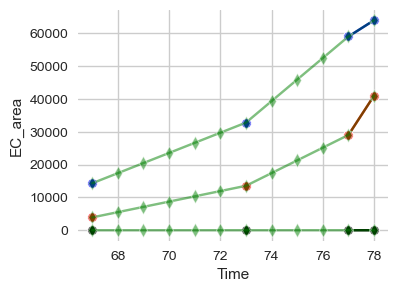

In [10]:


#Import libraries

import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Data

input_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/EC_OC_Percent_forintrapolation.csv"

df = pd.read_csv(input_csv)


# Interapolating data_all genotype

df['Int_EC_area'] = df['EC_area'].interpolate(methods='polynomial', order=5)
df['Int_Oc_area'] = df['Oc_area'].interpolate(methods='polynomial', order=5)
df['Int_Oo_percent'] = df['Oo_percent'].interpolate(methods='polynomial', order=5)

#Saving intraoikted data as csv file
df.to_csv('EC_OC_Percent_forintrapolation.csv')

# Plotting
plt.figure(figsize = (4,3))
plt.style.use('seaborn')
sns.set_style("whitegrid")

sns.lineplot(x='Time', y='EC_area', color='b', data=df, marker='o')
sns.lineplot(x='Time', y='Int_EC_area', data=df, color='g', dashes=True, marker='d', alpha = 0.5)

sns.lineplot(x='Time', y='Oc_area', color='r', data=df, marker='o')
sns.lineplot(x='Time', y='Int_Oc_area', data=df, color='g', dashes=True, marker='d', alpha = 0.5)

sns.lineplot(x='Time', y='Oo_percent', color='k', data=df, marker='o')
sns.lineplot(x='Time', y='Int_Oo_percent', data=df, color='g', dashes=True, marker='d', alpha = 0.5)



In [3]:
#curve from EC_OC_Percent

input2_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/EC_OC_Percent_intra_edited.csv"


# Define data

df2 = pd.read_csv(input2_csv)
df2.head()

,Time,Int_EC_area,Int_Oc_area,Int_Oo_percent,Int_Oo_percent.1
0,67,14315.83789,3904.54535,27.178018,0.271780
1,68,17395.10112,5510.27156,29.892577,0.298926
2,69,20474.36435,7115.99777,32.607136,0.326071
3,70,23553.62758,8721.72398,35.321695,0.353217
4,71,26632.89080,10327.45019,38.036254,0.380363


In [4]:
# curve for oocyte percent for stages8-11

x = df2['Time']
y3 = df2['Int_Oo_percent']

p3 = np.polyfit(x, np.log(y3), 1)
f3= lambda x: np.exp(p3[1]) * np.exp(p3[0]*x)

from sklearn.metrics import r2_score 
intercept, slope = p3

R3_square = r2_score(y3, f3(x)) 
print('Coefficient of Determination', R3_square)
print('Intercept:', intercept)
print('Slope:', slope)

Coefficient of Determination 0.9503561276561946
Intercept: 0.06695612544324513
Slope: -1.1442330182605036


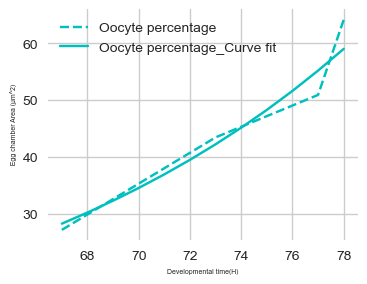

In [5]:
#Plotting  curves for oocyte percent

plt.figure(figsize = (4,3))
plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.plot(x, y3, color = 'c', linestyle = 'dashed')


#Predicted curve fit

plt.plot(x, f3(x), color = 'c')

#Labels
plt.xlabel('Developmental time(H)', fontsize=5)
plt.ylabel(' Egg chamber Area (μm^2)', fontsize=5)
plt.legend(labels=["Oocyte percentage", "Oocyte percentage_Curve fit"], fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)


#plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_percentage.pdf', dpi=300, bbox_inches='tight') 


plt.show()

In [6]:
# Calculate and print the values of the fitted curve
for i, x_val in enumerate(x):
    y3_val = f3(x_val)
    print("x =", x_val, ", Fitted y3 =", y3_val)

# Output the fitted exponential equation
print("\nFitted Exponential Equation: y3 =", np.exp(p3[1]), "* e^(", p3[0], "* x)")

x = 67 , Fitted y3 = 28.27074110017109
x = 68 , Fitted y3 = 30.2284493341469
x = 69 , Fitted y3 = 32.321726052719434
x = 70 , Fitted y3 = 34.55995917881656
x = 71 , Fitted y3 = 36.95318673555109
x = 72 , Fitted y3 = 39.51214186472512
x = 73 , Fitted y3 = 42.24830096280141
x = 74 , Fitted y3 = 45.17393515022152
x = 75 , Fitted y3 = 48.30216530490051
x = 76 , Fitted y3 = 51.64702090671181
x = 77 , Fitted y3 = 55.22350295686855
x = 78 , Fitted y3 = 59.04765125438145

Fitted Exponential Equation: y3 = 0.31846808334772786 * e^( 0.06695612544324513 * x)


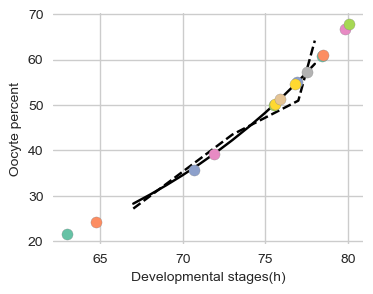

In [9]:
input8_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_percentcurve.csv"

df8 = pd.read_csv(input8_csv)
df8.head()

# Plotting
plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (4, 3), 'font.size': 30, 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})


plt.plot(x, y3, color = 'k', linestyle = 'dashed')
plt.plot(x, f3(x), color = 'k')

#Data from samples
x8 = df8['Time']

# List of EC columns to loop over

time_columns_x = ['xEC01', 'xEC02', 'xEC03', 'xEC04', 'xEC05', 'xEC06', 'xECH1', 'xECH2', 'xECH3', 'xECH4','xECH5', 'xECH6', 'xECH7', 'xECH8']
ec_columns_y = ['yEC01', 'yEC02', 'yEC03', 'yEC04', 'yEC05', 'yEC06', 'yECH1', 'yECH2', 'yECH3', 'yECH4', 'yECH5', 'yECH6', 'yECH7', 'yECH8']


# Set a color palett2
palette = sns.color_palette("Set2", len(ec_columns_y))

# Ensure that the DataFrame contains all the columns
required_columns = ec_columns_y + time_columns_x
missing_columns = [col for col in required_columns if col not in df8.columns]
if missing_columns:
    raise ValueError(f"DataFrame is missing columns: {missing_columns}")

# Set a color palette
palette = sns.color_palette("Set2", len(ec_columns_y))

# Specify the marker properties for each column
marker_style_dict = {ec_column: {'markersize': 8, 'edgecolor': 'grey', 'linewidth': 0.2} for ec_column in ec_columns_y}

# Loop through the EC columns and create line plots with specified marker properties
for i, ec_column in enumerate(ec_columns_y):
    style = marker_style_dict[ec_column]
    sns.lineplot(x=df8[time_columns_x[i]], y=df8[ec_column], marker='o', markersize=style['markersize'],
                 markeredgecolor=style['edgecolor'],
                 markeredgewidth=style['linewidth'], label=ec_column, color=palette[i], linewidth=1)

    
plt.xlabel('Developmental stages(h)', fontsize=10)
plt.ylabel(' Oocyte percent ', fontsize=10)


plt.xlim()
plt.ylim()
plt.legend([])
#plt.yscale("log")

#plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/oocyte_percentfitting_yp1_his_first_oovolume.pdf', dpi=300, bbox_inches='tight') 

plt.show()

In [8]:
input4_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/First_ECOcytepercent.csv"
df4 = pd.read_csv(input4_csv)



yOo = df4['Oo_percentage']

# Calculate the corresponding x value using the natural logarithm
xOo = (np.log(yOo/np.exp(p3[1])))/p3[0]


# Create a CSV file and write the xEC values
csv_file_path = '/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv'  # Provide the desired file path

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write header if needed
    writer.writerow(['xOo'])  # Add a header if necessary
    
    # Write xEC values
    for value in yOo:
        writer.writerow([value])

print(f'The xEC values have been saved to {csv_file_path}')

The xEC values have been saved to /Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv
